In [52]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Concatenate
from keras.optimizers import SGD 
from keras.utils import plot_model
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

x = np.array([[0,0], [0,1], [1,0], [1,1]], "float32")
y = np.array([[0], [1], [1], [0]], "float32")

def model_1_maker(activation_func: str, learning_rate: float, momentum: float) -> Sequential:
    inputs = Input(shape = (2,))
    out = Dense(1,activation=activation_func)(inputs)
    o = Concatenate(axis=1)([out,inputs])
    out2 = Dense(1,activation = activation_func)(o)
    model1 = Model(inputs = inputs, outputs = out2)
    model1.compile( loss = "mean_squared_error",
                    metrics=['accuracy', 'mean_absolute_error'],
                    optimizer=SGD(learning_rate=learning_rate, momentum=momentum))
    
    return model1

def model_2_maker(activation_func: str, learning_rate: float, momentum: float) -> Sequential:
    model = Sequential()
    model.add(Dense(2, activation=activation_func))
    model.add(Dense(1, activation=activation_func))
    model.compile(loss='mean_squared_error', 
                  metrics=['accuracy', 'mean_absolute_error'],
                  optimizer=SGD(learning_rate=learning_rate, momentum=momentum)) 
    
    return model

EPOCH_N = 3000 #* minimum is arround 2000
BATCH_S = 10 #* 32 is the default

In [53]:
 #! example
test_model = model_1_maker('sigmoid', 0.1, 0)
test_model.fit(x, y, epochs=EPOCH_N, batch_size=BATCH_S, verbose=0)

plot_model(test_model,show_shapes = True)

print(test_model.evaluate(x, y))
print((test_model.predict(x) > 0.5).astype('int32'))

1/1 [==============================] - 0s 141ms/step - loss: 0.2025 - accuracy: 1.0000 - mean_absolute_error: 0.4491
[0.20248855650424957, 1.0, 0.449114590883255]
1/1 [==============================] - 0s 65ms/step
[[0]
 [1]
 [1]
 [0]]


In [54]:
for k, v in test_model.get_metrics_result().items():
    print(k, " : ", float(v))

loss  :  0.20248855650424957
accuracy  :  1.0
mean_absolute_error  :  0.449114590883255


In [62]:
 #| Momentum testing:

m_models = [model_1_maker('sigmoid', 0.1, z) for z in map(lambda b : b/10, range(0, 10, 1))]

for m in m_models:
    m.fit(x, y, epochs=EPOCH_N, batch_size=BATCH_S, verbose=0)


#| Activation Function Testing:

af_models = [model_1_maker(af, 0.1, 0) for af in ['sigmoid', 'relu', 'tanh']]

for m in af_models:
    m.fit(x, y, epochs=EPOCH_N, batch_size=BATCH_S, verbose=0)

[<keras.engine.functional.Functional object at 0x7fdd38526410>, <keras.engine.functional.Functional object at 0x7fdd385264a0>, <keras.engine.functional.Functional object at 0x7fdd3850a9b0>, <keras.engine.functional.Functional object at 0x7fdd38508b20>, <keras.engine.functional.Functional object at 0x7fdccc746140>, <keras.engine.functional.Functional object at 0x7fdd3a89e5c0>, <keras.engine.functional.Functional object at 0x7fdd9458b910>, <keras.engine.functional.Functional object at 0x7fdd55fccc70>, <keras.engine.functional.Functional object at 0x7fdd550db220>, <keras.engine.functional.Functional object at 0x7fddbfb54dc0>]


In [56]:
 #| Grid Testing:
 
def make_momentum_models(a_f: str) -> list[Sequential]:
    return [model_1_maker(a_f, 0.1, z) for z in map(lambda b : b/10, range(0, 10, 1))]

m_dict = {af: make_momentum_models(af) for af in ['sigmoid', 'relu', 'tanh']}

print (m_dict)

{'sigmoid': [<keras.engine.functional.Functional object at 0x7fdd5585a140>, <keras.engine.functional.Functional object at 0x7fdd56701ff0>, <keras.engine.functional.Functional object at 0x7fdcec16afb0>, <keras.engine.functional.Functional object at 0x7fdcec168550>, <keras.engine.functional.Functional object at 0x7fdcec13d600>, <keras.engine.functional.Functional object at 0x7fdcec13c7f0>, <keras.engine.functional.Functional object at 0x7fdd3a89c7c0>, <keras.engine.functional.Functional object at 0x7fdd3a87b070>, <keras.engine.functional.Functional object at 0x7fdd3a85e170>, <keras.engine.functional.Functional object at 0x7fdd3a85ee00>], 'relu': [<keras.engine.functional.Functional object at 0x7fdd3a87baf0>, <keras.engine.functional.Functional object at 0x7fdd56a98dc0>, <keras.engine.functional.Functional object at 0x7fdd3a836a10>, <keras.engine.functional.Functional object at 0x7fdd3a9ef070>, <keras.engine.functional.Functional object at 0x7fdd3a976e60>, <keras.engine.functional.Functio

In [57]:
 #| Fitting the Models

i = 0
for af, models in m_dict.items():
    print(af)
    for m in models:
        print(i)
        m.fit(x, y, epochs=EPOCH_N, batch_size=BATCH_S, verbose=0)
        i += 1
    i = 0

sigmoid
0
1
2
3
4
5
6
7
8
9
relu
0
1
2
3
4
5
6
7
8
9
tanh
0
1
2
3
4
5
6
7
8
9


In [58]:
 #| Data (from full tests):

def momentums(): 
    return map(lambda b : b/10, range(0, 10, 1))

res_loss = {'sigmoid': {},
           'relu': {}, 
           'tanh': {}}

res_mae = {'sigmoid': {},
           'relu': {}, 
           'tanh': {}}

res_acc = {'sigmoid': {},
           'relu': {}, 
           'tanh': {}}

for af, models in m_dict.items():
    print(af)
    print(len(models))
    for momentum, model in zip(momentums(), models):
        metrics = model.get_metrics_result()
        res_loss[af] [momentum] = float(metrics['loss'])
        res_mae [af] [momentum] = float(metrics['mean_absolute_error'])
        res_acc [af] [momentum] = float(metrics['accuracy'])
        
print(res_loss)
print(res_mae)
print(res_acc)

sigmoid
10
relu
10
tanh
10
{'sigmoid': {0.0: 0.24995464086532593, 0.1: 0.24704912304878235, 0.2: 0.24998727440834045, 0.3: 0.2499816119670868, 0.4: 0.0695374608039856, 0.5: 0.09654679149389267, 0.6: 0.03422179073095322, 0.7: 0.01660614274442196, 0.8: 0.007471732795238495, 0.9: 0.004744043108075857}, 'relu': {0.0: 0.5, 0.1: 0.25, 0.2: 0.25, 0.3: 0.5, 0.4: 0.5, 0.5: 0.2499999701976776, 0.6: 0.2499999701976776, 0.7: 1.239825706293371e-13, 0.8: 0.25, 0.9: 0.5}, 'tanh': {0.0: 0.0013569669099524617, 0.1: 0.0010939659550786018, 0.2: 0.0009352308697998524, 0.3: 0.0007659544935449958, 0.4: 0.026486340910196304, 0.5: 0.0005190545343793929, 0.6: 0.00041198875987902284, 0.7: 0.00030272500589489937, 0.8: 0.00019946375687140971, 0.9: 9.354198846267536e-05}}
{'sigmoid': {0.0: 0.49995461106300354, 0.1: 0.4970177710056305, 0.2: 0.49998727440834045, 0.3: 0.49998152256011963, 0.4: 0.2619175612926483, 0.5: 0.3087078630924225, 0.6: 0.1837293654680252, 0.7: 0.12832078337669373, 0.8: 0.08608642220497131, 0.9

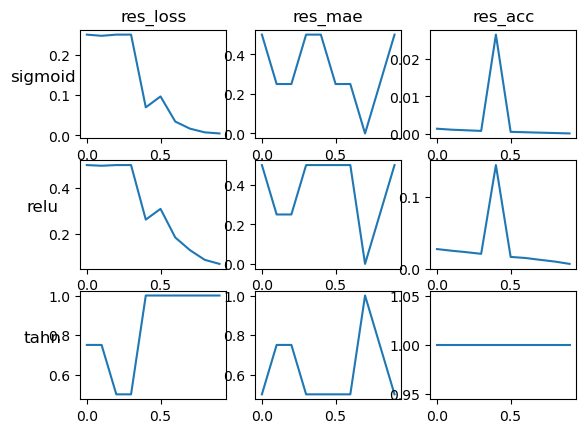

<Figure size 1000x1000 with 0 Axes>

In [59]:
# Plots:

#! What i want to plot: 
#! 9 plots (um para cada combinação de métrica e função de ativação) com x o momentum e y a métrica para esse momentum

import matplotlib.pyplot as plt


figure, axis = plt.subplots(3, 3)

plt.figure(figsize=(5, 5), dpi=200)

cols = ["res_loss","res_mae","res_acc"]
rows = ["sigmoid","relu","tahn"]

for ax, col in zip(axis[0], cols):
    ax.set_title(col)

for ax, row in zip(axis[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')


for index, name in enumerate(res_loss.keys()):
    X1 = res_loss[name].keys()
    Y1 = res_loss[name].values()
    axis[0, index].plot(X1, Y1)


for index, name in enumerate(res_mae.keys()):
    X1 = res_mae[name].keys()
    Y1 = res_mae[name].values()
    axis[1, index].plot(X1, Y1)


for index, name in enumerate(res_acc.keys()):
    X1 = res_acc[name].keys()
    Y1 = res_acc[name].values()
    axis[2, index].plot(X1, Y1)





In [60]:
print(list(momentums()))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [ ]:
# Momentum models graph

m_models = [model_1_maker('sigmoid', 0.1, z) for z in map(lambda b : b/10, range(0, 10, 1))]

for m in m_models:
    m.fit(x, y, epochs=EPOCH_N, batch_size=BATCH_S, verbose=0)

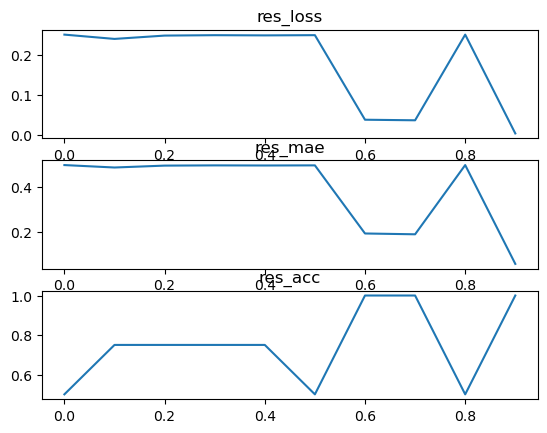

<Figure size 1000x1000 with 0 Axes>

In [68]:
models_data = {"res_loss" : [], "res_mae" : [], "res_acc" : [] , "momentum" : [b/10 for b in range(0, 10, 1)]}

for model in m_models:
    metrics = model.get_metrics_result()
    models_data["res_loss"].append(float(metrics['loss']))
    models_data["res_mae"].append(float(metrics['mean_absolute_error']))
    models_data["res_acc"].append(float(metrics['accuracy']))

figure, axis = plt.subplots(3, 1)
cols = ["res_loss","res_mae","res_acc"]

for ax, col in zip(axis, cols):
    ax.set_title(col)

axis[0].plot(models_data["momentum"],models_data["res_loss"])
axis[1].plot(models_data["momentum"],models_data["res_mae"])
axis[2].plot(models_data["momentum"],models_data["res_acc"])


plt.figure(figsize=(5, 5), dpi=200)
plt.show()